In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 데이터 로드
df = pd.read_csv("./translated_dialect_results_improved.csv")

df.head()

C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,standard_form,dialect_form,similarity,translated_dialect,bleu_score_original,bleu_score_translated,bleu_score_no_space,char_bleu_score
0,근데 그거 할려면은 몸 좋아야 되지 않아,겐디 그거 할려면은 몸 좋아야 되지 않,0.928874,근데 그거 할 려 면은 몸 좋아 야 되지 않,7.958668e-01,9.355070e-01,8.507331e-01,5.894160e-01
1,혼자 늙으면 이거 안될 수도 있을 건가,혼자 늙으면 이거 안될 수도 이실 건가,0.910187,혼자 늙 으면 이거 안될 수도 이실 건가,7.487402e-01,7.487402e-01,1.000000e+00,8.725129e-01
2,그렇게할 거 같아 어떻게 할거야,겅할 거 닮아 어떵할거,0.608592,겅 할 거 닮아 어떵 할거라,6.762970e-155,7.389948e-155,8.801117e-01,6.100034e-01
3,쫌 쫌 이렇게 삶을 평탄하게 사는 것 같대 물 흐르듯 물 흐르듯이 자연스럽게 사는 ...,쫌 쫌 이렇게 삶을 평탄하게 사는 것 같댄 물 흐르듯 물 흐르듯이 자연스럽게 사는 ...,0.978454,쫌 쫌 이렇게 삶 을 평 탄 하게 사는 것 같 댄 물 흐 르 듯 물 흐 르 듯이 자...,8.584923e-01,8.584923e-01,1.000000e+00,6.159040e-01
4,고민하고있어 어떡할지,고민하맨 어떵하코,0.205639,고민 햄서 어떵 할지,3.736372e-78,7.551819e-155,9.170599e-155,4.284993e-78


In [2]:
# 기존에 similarity_bin 열이 없다면 다시 생성
df['similarity_bin'] = pd.cut(df['similarity'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# 각 구간별로 CSV 파일 저장
for bin_label in df['similarity_bin'].unique():
    df_subset = df[df['similarity_bin'] == bin_label]
    filename = f"dialect_data_{bin_label.lower().replace(' ', '_')}.csv"
    df_subset.to_csv(filename, index=False)
    print(f"Saved {filename} with {len(df_subset)} rows.")

print("All files have been saved.")

Saved dialect_data_very_high.csv with 165041 rows.
Saved dialect_data_high.csv with 41989 rows.
Saved dialect_data_low.csv with 4677 rows.
Saved dialect_data_medium.csv with 11098 rows.
Saved dialect_data_very_low.csv with 473 rows.
All files have been saved.


# very low 분포

In [2]:
# 데이터 로드
df = pd.read_csv("./dialect_data_very_low.csv")

df.head()

,standard_form,dialect_form,similarity,translated_dialect,bleu_score_original,bleu_score_translated,bleu_score_no_space,char_bleu_score,similarity_bin
0,착했어,착핸,-0.015141,착 핸,9.291880e-232,9.291880e-232,1.491668e-154,1.646211e-231,Very Low
1,얼마였는데,얼마여신디,-0.054819,얼마 여신디,8.388266e-155,8.388266e-155,1.000000e+00,7.262123e-78,Very Low
2,그러니까 그렇게한대,게난 겅한댄,-0.052119,그러니까 겅 한댄,6.510101e-232,3.266829e-01,5.021334e-78,8.612150e-155,Very Low
3,그렇게하면서,겅허멍,-0.089639,겅 하멍,0.000000e+00,5.092529e-232,1.646211e-231,1.531972e-231,Very Low
4,그런데,경헌디이,-0.110624,겐디,0.000000e+00,0.000000e+00,5.635810e-232,5.635810e-232,Very Low


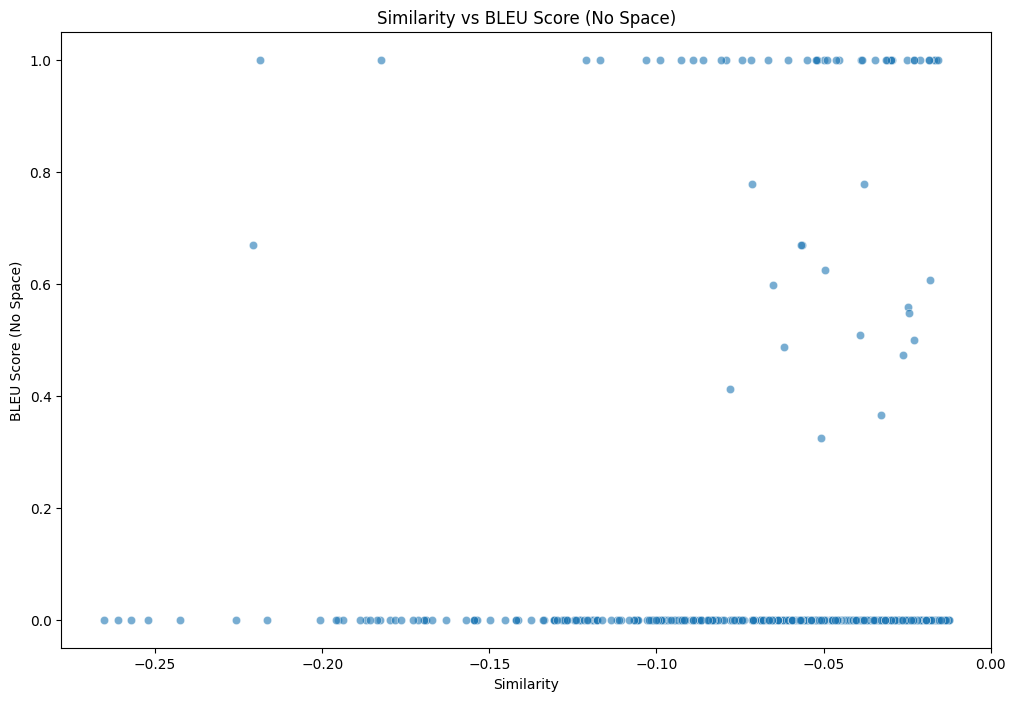

In [3]:
# 1. 산점도 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(x='similarity', y='bleu_score_no_space', data=df, alpha=0.6)
plt.title('Similarity vs BLEU Score (No Space)')
plt.xlabel('Similarity')
plt.ylabel('BLEU Score (No Space)')
plt.savefig('similarity_vs_bleu_scatter.png')
plt.show()
# plt.close()

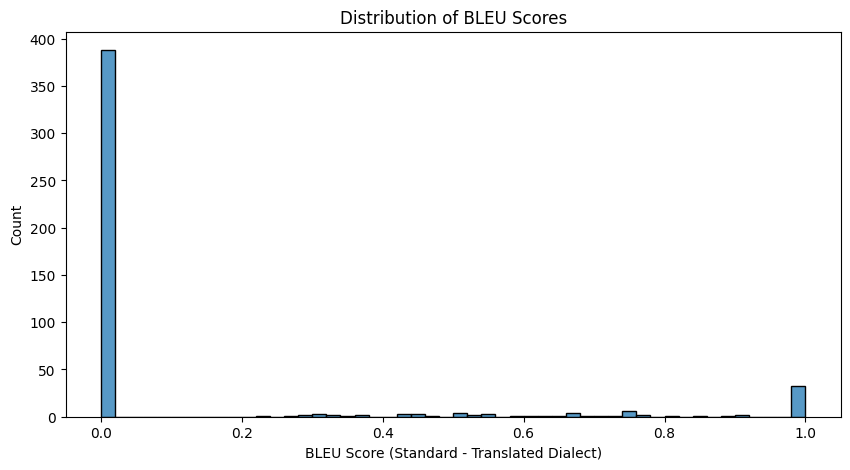

In [5]:
# 히스토그램 생성 (작은 크기)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='bleu_score_translated', bins=50, kde=False)
plt.title('Distribution of BLEU Scores')
plt.xlabel('BLEU Score (Standard - Translated Dialect)')
plt.ylabel('Count')
plt.show()

# low 분포

In [6]:
# 데이터 로드
df = pd.read_csv("./dialect_data_low.csv")

df.head()

,standard_form,dialect_form,similarity,translated_dialect,bleu_score_original,bleu_score_translated,bleu_score_no_space,char_bleu_score,similarity_bin
0,고민하고있어 어떡할지,고민하맨 어떵하코,0.205639,고민 햄서 어떵 할지,3.736372e-78,7.551819e-155,9.170599e-155,4.284993e-78,Low
1,그래 뭐 하려고 하니 하니깐 매운탕 하려고 합니다 하니깐,게난 뭐 허젠햄시허난 매운탕허젠 햄수다허난,0.171069,기 뭐 하젠 하난 매운 탕 하젠 햄수다 하난,2.015055e-78,1.375581e-01,2.748892e-01,3.124326e-01,Low
2,어게,오게,0.146714,어게,1.531972e-231,1.491668e-154,1.531972e-231,1.531972e-231,Low
3,그렇게 말했잖아,겅 고랐잖아,0.076688,겅 말했 네,5.622823e-155,4.502083e-155,1.003274e-231,7.579654e-155,Low
4,보리빵에,보리빵에이,0.136263,보리 빵 에,6.687403e-01,1.000000e+00,7.788008e-01,9.013779e-155,Low


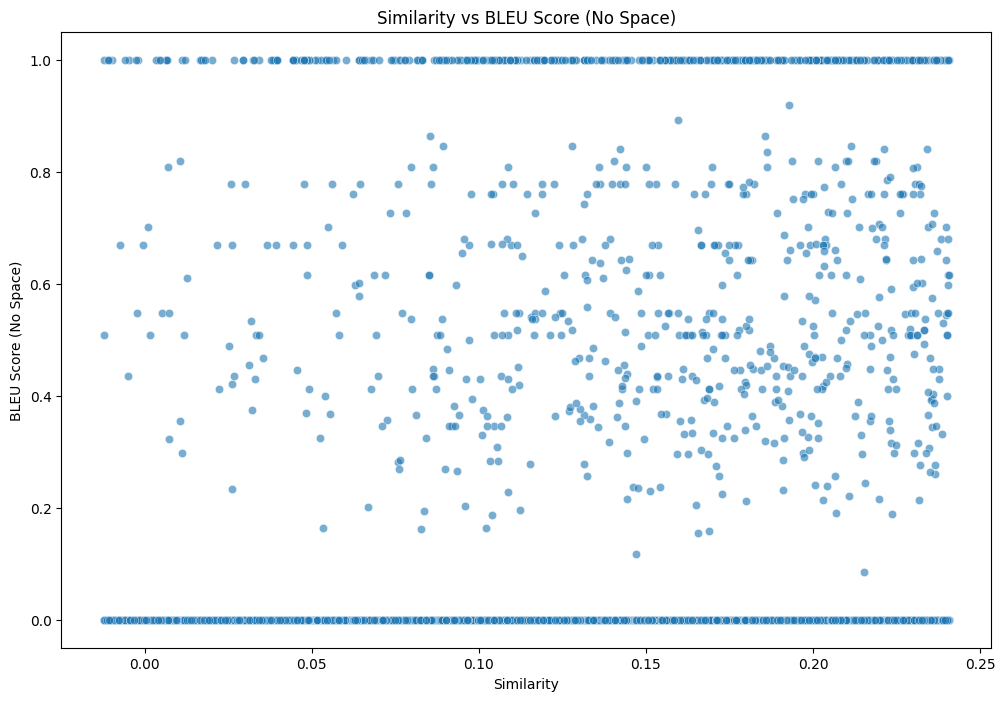

In [7]:
# 1. 산점도 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(x='similarity', y='bleu_score_no_space', data=df, alpha=0.6)
plt.title('Similarity vs BLEU Score (No Space)')
plt.xlabel('Similarity')
plt.ylabel('BLEU Score (No Space)')
plt.savefig('similarity_vs_bleu_scatter.png')
plt.show()

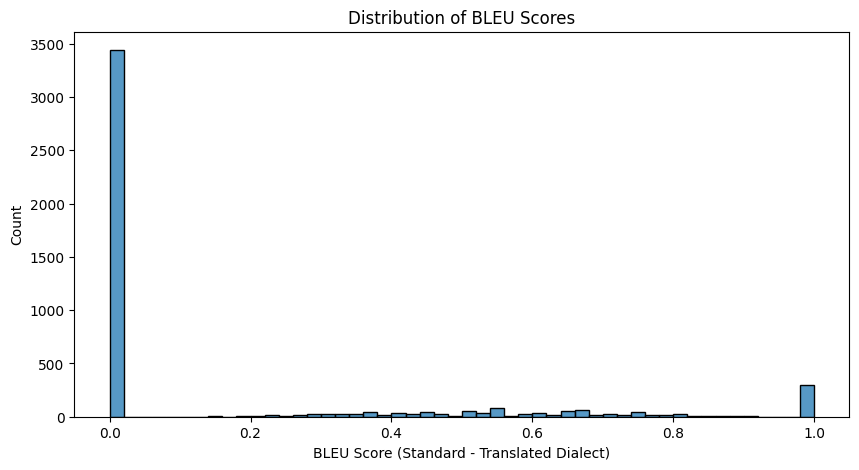

In [8]:
# 히스토그램 생성 (작은 크기)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='bleu_score_translated', bins=50, kde=False)
plt.title('Distribution of BLEU Scores')
plt.xlabel('BLEU Score (Standard - Translated Dialect)')
plt.ylabel('Count')
plt.show()

# medium 분포

In [9]:
# 데이터 로드
df = pd.read_csv("./dialect_data_medium.csv")

df.head()

,standard_form,dialect_form,similarity,translated_dialect,bleu_score_original,bleu_score_translated,bleu_score_no_space,char_bleu_score,similarity_bin
0,맛 어떻니,마더 땡이니,0.373876,맛 어떵,1.218332e-231,8.121328e-155,0.000000e+00,7.813508e-232,Medium
1,그거 그러니까 그렇게 하니까 해야겠다,그거 거난 그추룩 허나난 해야됨직하구나이,0.384115,그거 게난 겅 하난 해야 겠다,6.637999e-155,1.903080e-01,2.466681e-78,1.783344e-01,Medium
2,그거 밖에 없는데요,거밖에 어신거,0.300387,그거 밖에 어신디 예,4.138222e-78,3.457208e-01,5.169732e-01,3.672056e-01,Medium
3,미워서 말하는 말이니 이제,미원 곧는 말과 이제,0.484125,미 웡 곧는 말이 니 이제,6.664457e-155,4.888290e-01,5.309414e-78,3.661926e-01,Medium
4,꼴이뭐에요,꼴이뭐꽈,0.310605,촐 이 뭐꽈,6.725855e-78,7.422681e-155,8.636169e-78,8.388266e-155,Medium


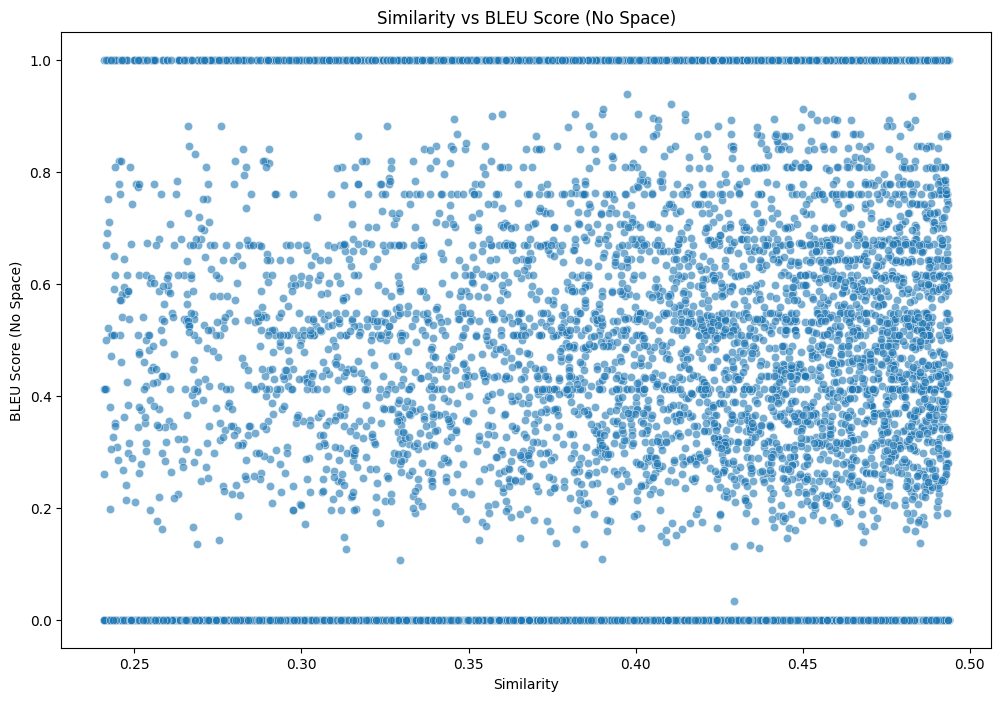

In [10]:
# 1. 산점도 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(x='similarity', y='bleu_score_no_space', data=df, alpha=0.6)
plt.title('Similarity vs BLEU Score (No Space)')
plt.xlabel('Similarity')
plt.ylabel('BLEU Score (No Space)')
plt.savefig('similarity_vs_bleu_scatter.png')
plt.show()

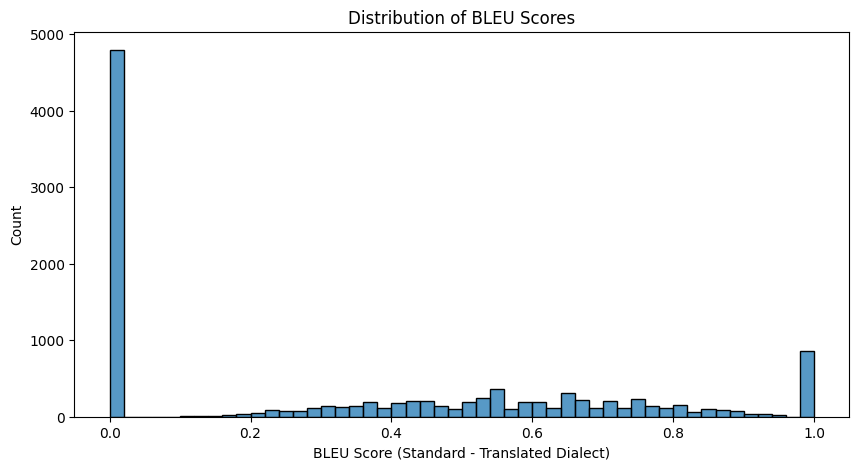

In [11]:
# 히스토그램 생성 (작은 크기)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='bleu_score_translated', bins=50, kde=False)
plt.title('Distribution of BLEU Scores')
plt.xlabel('BLEU Score (Standard - Translated Dialect)')
plt.ylabel('Count')
plt.show()

# high 분포

In [12]:
# 데이터 로드
df = pd.read_csv("./dialect_data_high.csv")

df.head()

,standard_form,dialect_form,similarity,translated_dialect,bleu_score_original,bleu_score_translated,bleu_score_no_space,char_bleu_score,similarity_bin
0,그렇게할 거 같아 어떻게 할거야,겅할 거 닮아 어떵할거,0.608592,겅 할 거 닮아 어떵 할거라,6.762970e-155,7.389948e-155,8.801117e-01,6.100034e-01,High
1,음 그러니까 이게,음 그니까 이게,0.734389,음 게난 이게,5.115078e-01,6.222677e-155,7.600394e-155,5.473461e-78,High
2,얄짤 없어,얄짤 어서,0.659059,얄 짤 언,1.054769e-154,8.121328e-155,8.121328e-155,9.283143e-155,High
3,완전 꽉꽉 찼다,완전 꽉꽉 찼다이,0.729666,완전 꽉 꽉 찬,8.091067e-01,5.475183e-01,4.482700e-01,3.628241e-01,High
4,어떻게 해야 하면 좋을지도 모르겠고,어떵 해사 하믄 좋을지도 모르겠고,0.745434,어떵 해야 하면 좋을 지도 모르겠 고,5.184664e-01,7.965486e-01,6.298130e-01,4.537237e-01,High


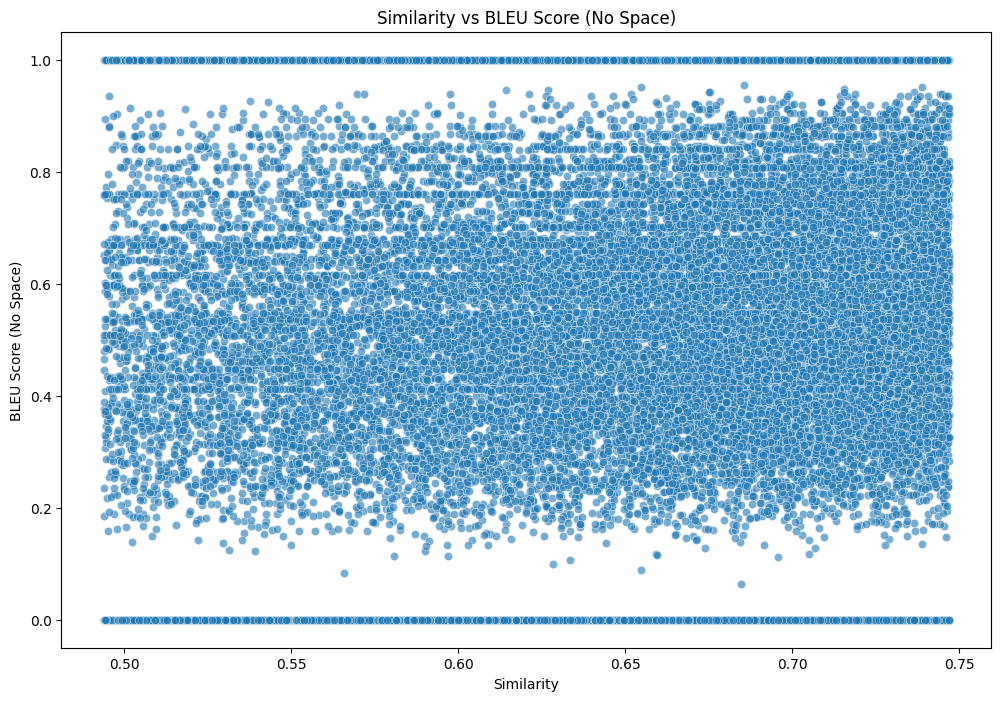

In [13]:
# 1. 산점도 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(x='similarity', y='bleu_score_no_space', data=df, alpha=0.6)
plt.title('Similarity vs BLEU Score (No Space)')
plt.xlabel('Similarity')
plt.ylabel('BLEU Score (No Space)')
plt.savefig('similarity_vs_bleu_scatter.png')
plt.show()

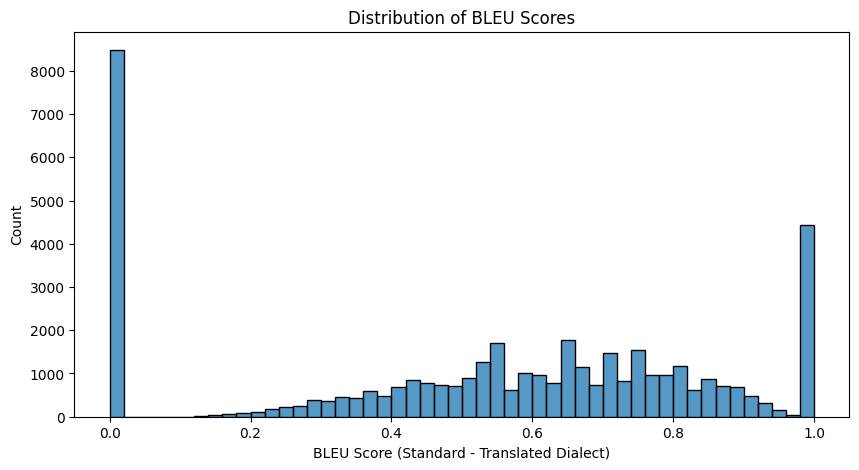

In [14]:
# 히스토그램 생성 (작은 크기)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='bleu_score_translated', bins=50, kde=False)
plt.title('Distribution of BLEU Scores')
plt.xlabel('BLEU Score (Standard - Translated Dialect)')
plt.ylabel('Count')
plt.show()

# very high 분포

In [15]:
# 데이터 로드
df = pd.read_csv("./dialect_data_very_high.csv")

df.head()

,standard_form,dialect_form,similarity,translated_dialect,bleu_score_original,bleu_score_translated,bleu_score_no_space,char_bleu_score,similarity_bin
0,근데 그거 할려면은 몸 좋아야 되지 않아,겐디 그거 할려면은 몸 좋아야 되지 않,0.928874,근데 그거 할 려 면은 몸 좋아 야 되지 않,0.795867,0.935507,0.850733,0.589416,Very High
1,혼자 늙으면 이거 안될 수도 있을 건가,혼자 늙으면 이거 안될 수도 이실 건가,0.910187,혼자 늙 으면 이거 안될 수도 이실 건가,0.748740,0.748740,1.000000,0.872513,Very High
2,쫌 쫌 이렇게 삶을 평탄하게 사는 것 같대 물 흐르듯 물 흐르듯이 자연스럽게 사는 ...,쫌 쫌 이렇게 삶을 평탄하게 사는 것 같댄 물 흐르듯 물 흐르듯이 자연스럽게 사는 ...,0.978454,쫌 쫌 이렇게 삶 을 평 탄 하게 사는 것 같 댄 물 흐 르 듯 물 흐 르 듯이 자...,0.858492,0.858492,1.000000,0.615904,Very High
3,뭐 하는 거야 지금 나 이런 거 못 참는 거 알면서도 일부러 그렇게 한 거 아니야 ...,뭐 하는 거 지금 나 이런 거 못 참는 거 알면서도 일부러 그렇게 한 거 아니 내 ...,0.980114,뭐 하는 거 지금 나 이런 거 못 참 는 거 알 면서도 일부러 그렇게 한 거 아니 ...,0.850769,0.850769,1.000000,0.827755,Very High
4,근데 나 그 동영상만 봤거든 근데 진짜 힘들꺼 닮아,근데 나 그 동영상만 봤거든 근데 진짜 힘들거담,0.938030,근데 나 그 동영 상 만 봤거든 근데 진짜 힘들 꺼 닮아,0.839829,1.000000,0.837184,0.681394,Very High


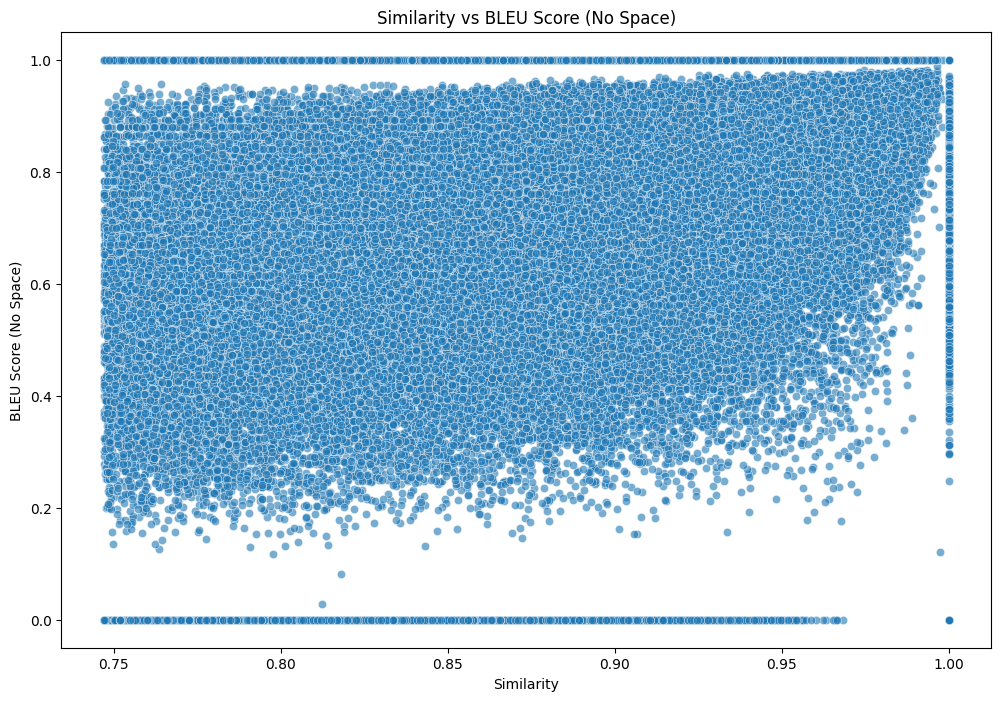

In [16]:
# 1. 산점도 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(x='similarity', y='bleu_score_no_space', data=df, alpha=0.6)
plt.title('Similarity vs BLEU Score (No Space)')
plt.xlabel('Similarity')
plt.ylabel('BLEU Score (No Space)')
plt.savefig('similarity_vs_bleu_scatter.png')
plt.show()

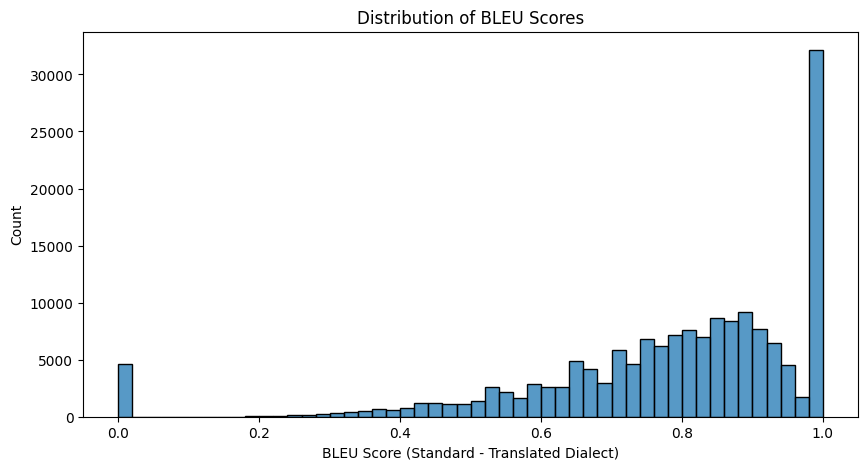

In [17]:
# 히스토그램 생성 (작은 크기)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='bleu_score_translated', bins=50, kde=False)
plt.title('Distribution of BLEU Scores')
plt.xlabel('BLEU Score (Standard - Translated Dialect)')
plt.ylabel('Count')
plt.show()